In [28]:
import numpy as np
import scipy.stats as stats
from tqdm import tqdm as tqdm
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<div style="display: flex;">
  <div style="flex: 1; padding: 10px;">
    <b>Немного о себе</b><br>
     
- Старший аналитик Яндекса 
      
- Отвечаю за методологию платформы экспериментов Лаба в Яндекс.Go

- Более 10 лет веду курсы в ШАД и отучила уже более 1000 человек.<br>
  </div
  <div style="flex: 1; padding: 10px;">
    <b></b><br>
    <br>
    <img src="pictures/Dilya_photo.jpeg" alt="Диля Хакомова" width="100"/>
  </div>
</div>

# 1. Введение в А/B тесты

## 1.1 Как менялся Яндекс.Поиск со временем

[Источник скриншотов](https://fotostrana.ru/fsnews/fast/232799/1324352113)


<div style="display: flex;">
    <img src="pictures/Яндекс2000.jpg" width="300">
    <img src="pictures/Яндекс2001.jpg" width="300">
    <img src="pictures/Яндекс2002_2003.jpg" width="300">
</div>

<div style="display: flex;">
    <img src="pictures/Яндекс2004_2006.jpg" width="300">
    <img src="pictures/Яндекс2007_2009.jpg" width="300">
    <img src="pictures/Яндекс2010_2012.jpg" width="300">
</div>

<div style="display: flex;">
    <img src="pictures/Яндекс2013.jpg" width="300">
    <img src="pictures/Яндекс2014_2015.jpg" width="300">
    <img src="pictures/Яндекс2016_2017.jpg" width="300">
</div>

### Современная версия Яндекс.Поиска
<img src="pictures/Яндекс2025.png" width="600" align="left">



В зрелых продуктах любое изменение – это работа менеджеров, продуктологов, дизайнеров и аналитиков, а также тысячи проведенных экспериментов.  


## 1. 2 Практический кейс
<b>Тестируем новый функционал в приложении Яндекс.Такси. Теперь в высокий спрос пишем пользователю, что если подождать X минут цена упадет на Y рублей.</b>

Через 10 минут стенет дешевле на 100 рублей. 

<img src="pictures/trips.png" width="600">

А что на самом деле могло произойти?
- ухудшилась погода
- предновогодняя неделя
- действительно крутую фичу предложили

## 1.3 А/B-тестирование
> **А/B-тестирование** — это способ определить влияние на продукт внедрённых изменений, исключив внешние факторы. Для проведение такого тестирования мы разбиваем пользователей на две группы контрольную (A) и тестовую (B). Контрольную группу мы оставляем без изменения. В тестовой группе мы включаем новую фичу. 

У А/B-тестирование есть свои ограничения:
- Требуется развитая инфраструктура для проведения
- Большой размер клиентской базы
- Время на проведение и анализ 

Альтернатива: 
- Опросы пользователей
- Глубинные интервью 
- Юзабилити тестирования

В идеале: использовать и А/B-тестирование и качественные исследования. 

### Как устроен запуск эксперимента?

- Подумали на что влияет наша фича и как будем измерять эффект (метрики)
- Разбили пользователей нашего сервиса на две группы тест и контроль
- Включили тестируемую фичу на тестовой группе
- Собираем сырые логи
- Анализируем результаты

### Laba - платформа по анализу А/B-тестов в Яндекс.Райдтех

<img src="pictures/laba.png" width="800" align="left">




Лабе всего 1.5 года, поэтому мы внедрили в нее все индустриальные стандарты и продолжаем активно ее развивать. 

## 1.4 Типы метрик


<img src="pictures/metrics.png" width="800" align="left">


Value метрики: 

1. **GMV**: Общая стоимость успешных поездок 


2. **Trips**: Количество уникальных успешно выполненных заказов


3. **SH**: Cуммарное количеству часов, когда водитель готов принимать заказы (статус 'free') или выполняет заказ (статусы 'waiting', 'driving', 'transporting')



Метрики отношения: 

1. **Acceptance Rate (or AR)**: Отношение количества принятых кандидатом предложений о заказе (офферов) к количеству увиденных кандидатом предложений о заказе


2. **Completed Rate (or CR)**: Отношение суммарного количества поездок к суммарному количеству заказов с назначенным исполнителем. Отражает вероятность того, что заказ будет успешно выполнен.


3. **Доля чаевых от GMV**: Cумма всех чаевых к общей стоимости успешных поездок. 


4. **Trips per hours**: Количество уникальных успешно выполненных заказов к суммарному количеству часов, когда водитель готов принимать заказы (статус 'free') или выполняет заказ (статусы 'waiting', 'driving', 'transporting')


5. Классические **конверсии**: пришел, увидел, победил


<span style="color:red">В первой части курса мы ограничимся рассмотрением только value-метрик. Метрики-отношения требуют дополнительной подготовки, поэтому их мы изучим позже. </span>

## 1.5 Агрегация
<span style="color:red">Немного забегая вперед ... </span>

Позже мы рассмотрим:
- почему нельзя использовать сырые данные и как зависимость мешает анализу
- какие еще виды агрегации бывают и почему мы выбрали поюзерную 

### Сырые логи и единица наблюдения
<img src="pictures/raw_logs.png" width="400" align="left">



> **Поюзерная агрегация** - агрегация (типа сумма) до пользователя, то есть один пользователь - одно наблюдение

$$\sum_{e \in E_t} X(e) = \sum\limits_{u \in U_t} X(u)$$

$E_t$ - это множество событий в тестовой группе.

$U_t$ - это множество пользователей в тестовой группе.

$X(e), X(u)$ - это значение метрики по событию или по пользователю соответственно. 

<img src="pictures/sum.png" width="300" align="left">

Сравнивая тест и контроль, мы будем сравнивать средние: 
$$\sum_{e \in E_t} X(e) = \sum\limits_{u \in U_t} X(u) \rightarrow \dfrac{\sum\limits_{u \in U_t} X(u)}{n} = \bar X_t$$

Какая статистика нужна для AB тестов? 

# 2. Распределение случайной величины 

У нас есть две выборки данных 

$X^t_1, X^t_2, \dots, X^t_n$ - тестовая группа размера $n$

$X^c_1, X^c_2, \dots, X^c_m$ - контрольная группа размера $m$

<span style="color:red">Мы не требуем равенства $n$ и $m$. </span>

Несколько базовых предположений: 
- каждое наблюдение - это случайная величина
- наблюдения внутри группы независимы и приходят из одного и того же распределения 
- наблюдения между группами независимы (если есть сетевые эффекты, то используется специальный метод switchback-эксперименты)
- каждая выборка данных является репрезентативной, то есть "хорошим" представителем нашей генеральной совокупности


> **Случайная величина** $X$ — это переменная, которая в результате испытания принимает одно из возможных значений, заранее неизвестное

>**Распределение случайной величины** $F(x)$ показывает, как “устроены” вероятности между возможными значениями случайной величины.



## 2.1 Дискретная случайная величина
**Дискретная случайная величина** — это случайная величина, принимающая конечное или счётное множество значений.

Распределение задаётся с помощью вероятностной функции (функции распределения вероятностей):  
$$
P(X = x_i) = p_i, \quad \sum_{i} p_i = 1
$$  
где $x_i$ — возможные значения, а $p_i$ — соответствующие вероятности.

Математическое ожидание (среднее) ДСВ:  
$$
\mathbb{E}[X] = \sum_{i} x_i \cdot p_i
$$

Дисперсия:  
$$
\mathrm{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \sum_{i} (x_i - \mathbb{E}[X])^2 p_i
$$


**Пример:** 

Рассмотрим дискретную случайную величину $X$, имеющую распределение Бернулли с параметром $p$ (вероятность успеха):

- $X = 1$ с вероятностью $p$ (успех)
- $X = 0$ с вероятностью $1-p$ (неудача)

Тогда для случайной величины $X$:

---

Математическое ожидание:


$\mathbb{E}[X] = 0 \cdot (1-p) + 1 \cdot p = p$


---

Дисперсия:


$\operatorname{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = (0 - p)^2 \cdot (1-p) + (1 - p)^2 \cdot p$


Посчитаем:

- $(0 - p)^2 \cdot (1-p) = p^2 (1-p)$
- $(1 - p)^2 \cdot p = (1 - 2p + p^2)p = p - 2p^2 + p^3$

$\operatorname{Var}(X) = p^2(1-p) + p - 2p^2 + p^3 = p(1 - p)$


---

## 2.2 Непрерывная случайная величина

Непрерывная случайная величина — это случайная величина, принимающая любые значения из некоторого (обычно бесконечного) интервала.

Распределение задаётся *плотностью вероятности* $f(x)$, $F'(x) = f(x)$, где  
$$
F(b) - F(a) = P(a \leq X \leq b) = \int_{a}^{b} f(x)\, dx
$$  
и  
$$
\int_{-\infty}^{\infty} f(x) \, dx = 1
$$

Математическое ожидание (интегральная формула):  
$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x)\, dx
$$

Дисперсия (интегральная формула):  
$$
\mathrm{Var}(X) = \int_{-\infty}^{\infty} (x - \mathbb{E}[X])^2 f(x)\, dx
$$


**Пример:** 

Нормальное распределение $\mathcal{N}(\mu, \sigma^2)$ — непрерывное распределение, в котором плотность убывает с ростом расстояния от $\mu$ по экспоненте квадрата.


$$
f(x) = \dfrac{1}{\sqrt{2\pi}\,\sigma}\;\exp\left(-\,\dfrac{(x-\mu)^2}{2\sigma^2}\right)
$$

где  
- $x$ — аргумент (значение случайной величины),  
- $\mu$ — среднее (математическое ожидание),  
- $\sigma^2$ — дисперсия (квадрат стандартного отклонения),  
- $\exp$ — показатель экспоненты


Для стандартного нормального распределения ($\mu=0$, $\sigma=1$):

$$
\varphi(x) = \dfrac{1}{\sqrt{2\pi}}\,\exp^{-x^2/2}
$$

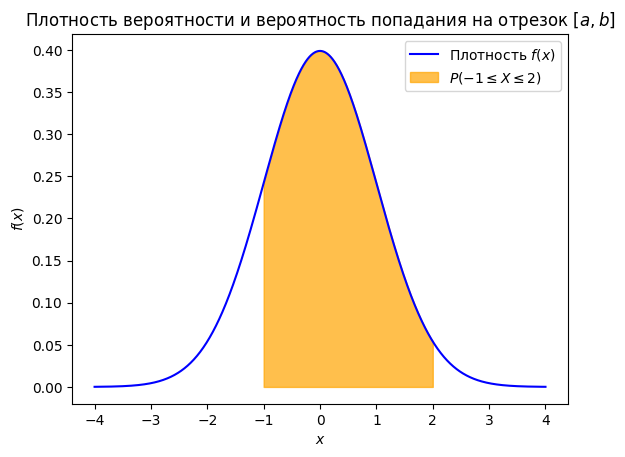

In [30]:
mu, sigma = 0, 1
a, b = -1, 2

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, 'b-', label='Плотность $f(x)$')

# закрасим область между a и b
x_fill = np.linspace(a, b, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, 0, y_fill, color='orange', alpha=0.7, label=f'$P({a} \\leq X \\leq {b})$')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.title('Плотность вероятности и вероятность попадания на отрезок $[a, b]$')
plt.show()

In [31]:
from scipy import stats
from scipy.stats import norm, expon, uniform, poisson, bernoulli, binom, t

## 2.3 Основные распределения в Phyton

- stats.norm
- stats.expon
- stats.uniform
- stats.poisson
- stats.bernoulli 
- stats.binom
- stats.t(df = 5)


### **Во всех случаях:**
- rvs — генерация выборки
- pdf (probability density function) — плотность (для непрерывных), pmf (probability mass function) — вероятность (для дискретных)
- cdf — функция распределения $P(X \leq x)$
- ppf — квантиль (обратная к cdf: значение x по заданной вероятности)
- mean(), var() — среднее и дисперсия


| Название распределения         | Задать параметры                | Плотность/вероятность в точке     | Значение функции распределения (CDF) в точке | Вероятность попасть на отрезок \([a, b]\)                      | Квантиль (обратная CDF)    |
|-------------------------------|---------------------------------|------------------------------------|----------------------------------------------|----------------------------------------------------------------|----------------------------|
| Нормальное                | stats.norm(loc=3, scale=2)    | dist.pdf(x)                      | dist.cdf(x)                                | dist.cdf(b) - dist.cdf(a)                                    | dist.ppf(q)              |
| Экспоненциальное          | stats.expon(loc=0, scale=2)   | dist.pdf(x)                      | dist.cdf(x)                                | dist.cdf(b) - dist.cdf(a)                                    | dist.ppf(q)              |
| Равномерное               | stats.uniform(loc=1, scale=4) | dist.pdf(x)                      | dist.cdf(x)                                | dist.cdf(b) - dist.cdf(a)                                    | dist.ppf(q)              |
| Пуассоновское             | stats.poisson(mu=5)           | dist.pmf(k)                      | dist.cdf(k)                                | dist.cdf(b) - dist.cdf(a-1) *(k — целое!)*                   | dist.ppf(q)              |
| Бернулли                  | stats.bernoulli(p=0.6)        | dist.pmf(k)                      | dist.cdf(k)                                | dist.cdf(b) - dist.cdf(a-1) *(k = 0 или 1)*                  | dist.ppf(q)              |
| Биномиальное              | stats.binom(n=10, p=0.4)      | dist.pmf(k)                      | dist.cdf(k)                                | dist.cdf(b) - dist.cdf(a-1) *(k — целое!)*                   | dist.ppf(q)              |
| t-распределение (Стьюдента) | stats.t(df=5)                  | dist.pdf(x)                      | dist.cdf(x)                                | dist.cdf(b) - dist.cdf(a)                                    | dist.ppf(q)              |

In [32]:
#Задаем распределение
dist = stats.norm(loc=0, scale=1)

In [33]:
dist.rvs((3, 10))

array([[ 0.47624609,  0.10591049, -1.6107404 ,  0.920049  , -0.5595385 ,
        -0.60248882,  0.46590011, -0.18577082, -0.23106875,  1.39010829],
       [ 1.95579504, -0.55153442,  1.36173955,  1.72636517, -0.62294988,
        -1.15622804, -1.77894144,  1.20869064, -2.53607506, -0.60509254],
       [-0.99838371,  0.54957934,  0.33758217,  0.50983208, -0.67493412,
        -0.48111658,  1.34870003, -0.34245186,  0.06208493,  0.61318166]])

In [34]:
# pdf в точке x=1 (плотность вероятности), для дискретной величины pmf 
prob_density = dist.pdf(2)
prob_density

0.05399096651318806

In [35]:
# cdf в точке x=4, вероятность попасть "левее" заданной точки, включая её
cum_prob = dist.cdf(0)
cum_prob

0.5

In [36]:
# вероятность попасть на отрезок [0.5, 2]
interval_prob = dist.cdf(2) - dist.cdf(0.5)
interval_prob

0.2857874067778077

In [37]:
# вероятность попасть в хвост от 2 до бесконечности 
interval_prob = 1- dist.cdf(2)
interval_prob

0.02275013194817921

95-й квантиль - dist.ppf(0.95) вычисляет такое значение $x_{0.95}$, для которого вероятность $P(X \leq x_{0.95}) = 0.95$. 
Если заштриховать левую часть графика до уровня 0.95 по площади — ppf(0.95) найдёт границу справа этой области.

In [38]:
# 95-й квантиль, percent point function, обратная для cdf

x_95 = dist.ppf(0.95)
x_95

1.6448536269514722

In [39]:
x_05 = dist.ppf(0.05)
x_05

-1.6448536269514729

In [40]:
# Эта функция строит плотность и распределение случайной величины
def dist_plot(dist, x, ftype = 'pdf'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    if ftype == 'pdf':
        axes[0].plot(x, dist.pdf(x), 'b-', label='pdf')
    else: 
        axes[0].vlines(x, 0, dist.pmf(x), colors="b", lw=6, alpha=0.6, label='pmf')
    axes[0].set_title('Плотность')
    axes[0].set_xlabel('$x$')
    axes[0].set_ylabel('$f(x)$')
    axes[0].legend()

    if ftype == 'pdf':
        axes[1].plot(x, dist.cdf(x), 'orange', label='cdf')
    else: 
        axes[1].step(x, dist.cdf(x), where="mid", color="orange", lw=3, label='cdf')
    axes[1].set_title('Функция распределения')
    axes[1].set_xlabel('$x$')
    axes[1].set_ylabel('$F(x)$')
    axes[1].legend()
    plt.tight_layout()
    plt.show()

## Нормальное распределение
- Самое известное распределение, будет играть особую роль в нашем курсе, потому что большинство оценок, которые мы будем строить на асимптотике будут иметь нормальное распределение

Нормальное распределение $\mathcal{N}(\mu, \sigma^2)$ — непрерывное распределение, в котором плотность убывает с ростом расстояния от $\mu$ по экспоненте квадрата.

**Функция плотности вероятности (PDF):**

$
f(x) = \dfrac{1}{\sqrt{2\pi}\,\sigma}\;\exp\left(-\,\dfrac{(x-\mu)^2}{2\sigma^2}\right)
$

**Математическое ожидание:**

$\mathbb{E}[X] = \mu$


**Дисперсия:**

$\mathrm{Var}(X) = \sigma^2$


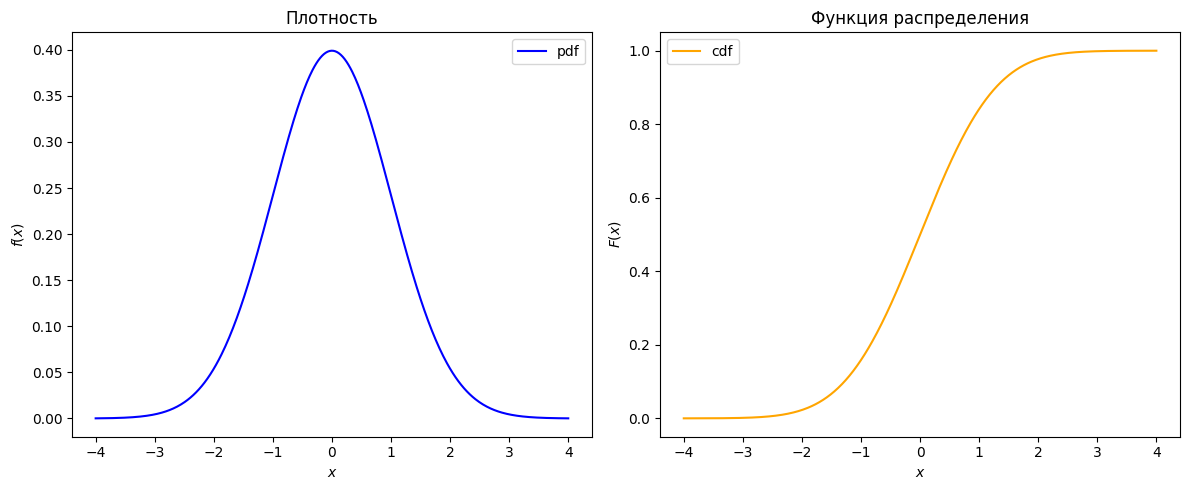

In [41]:
x = np.linspace(-4, 4, 500)
mu, sigma = 0, 1
dist = stats.norm(loc=mu, scale=sigma)
dist_plot(dist, x)

## Экспоненциальное распределение
- Хорошо описывает все денежные метрики

**Функция плотности вероятности (PDF):**

$
f(x) = 
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0 \\
\end{cases}
$

где  
— $\lambda > 0$ — параметр интенсивности (скорости),  
— $x$ — значение случайной величины.

---

**Функция распределения (CDF):**

$
F(x) =
\begin{cases}
1 - e^{-\lambda x}, & x \geq 0 \\
0, & x < 0 \\
\end{cases}
$

---

**Математическое ожидание:**

$
\mathbb{E}[X] = \dfrac{1}{\lambda}
$

**Дисперсия:**

$
\mathrm{Var}(X) = \dfrac{1}{\lambda^2}
$


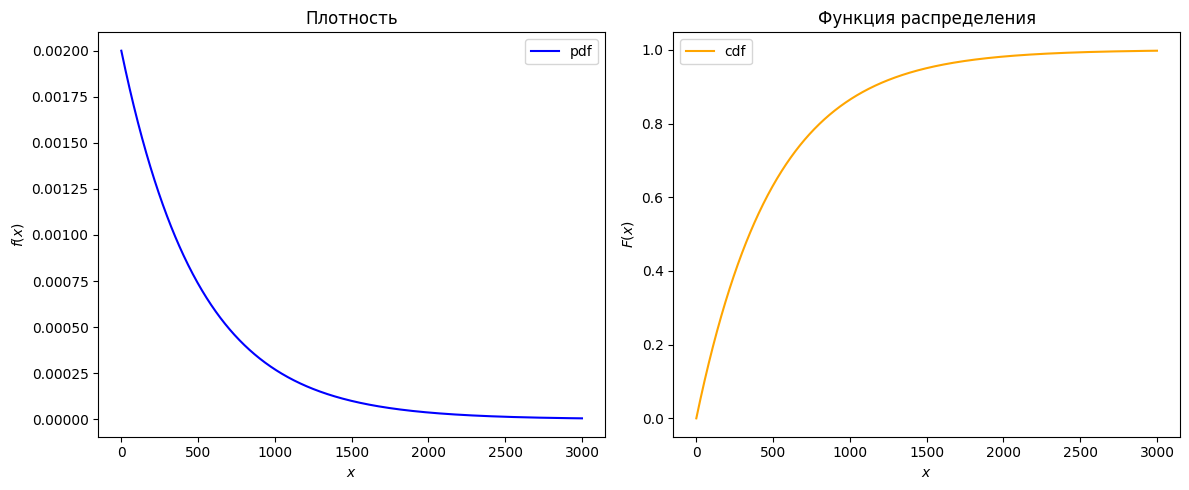

In [42]:
x = np.linspace(0, 3000, 1000)
mean = 500
lam = 1 / mean
dist = stats.expon(scale=mean)
dist_plot(dist, x)

## Равномерное распределение

Очень известное распределение, мы будем им пользоваться 
- для симуляций 
- распределение p-value при верности нулевой гипотезы - отсутствии эффекта (пока без подробностей)

**Функция плотности вероятности (PDF):**
$f(x) =
\begin{cases}
\dfrac{1}{b - a}, & a \leq x \leq b \\
0, & x < a \text{ или } x > b \\
\end{cases}
$

---

**Функция распределения (СDF):**
$
F(x) =
\begin{cases}
0, & x < a \\
\dfrac{x-a}{b-a}, & a \leq x \leq b \\
1, & x > b \\
\end{cases}
$

Где:  
- $x$ — значение случайной величины  
- $[a, b]$ — границы интервала

**Математическое ожидание:**

$\mathbb{E}[X] = \dfrac{a+b}{2}$


**Дисперсия:**

$\mathrm{Var}(X) = \dfrac{(b-a)^2}{12}$


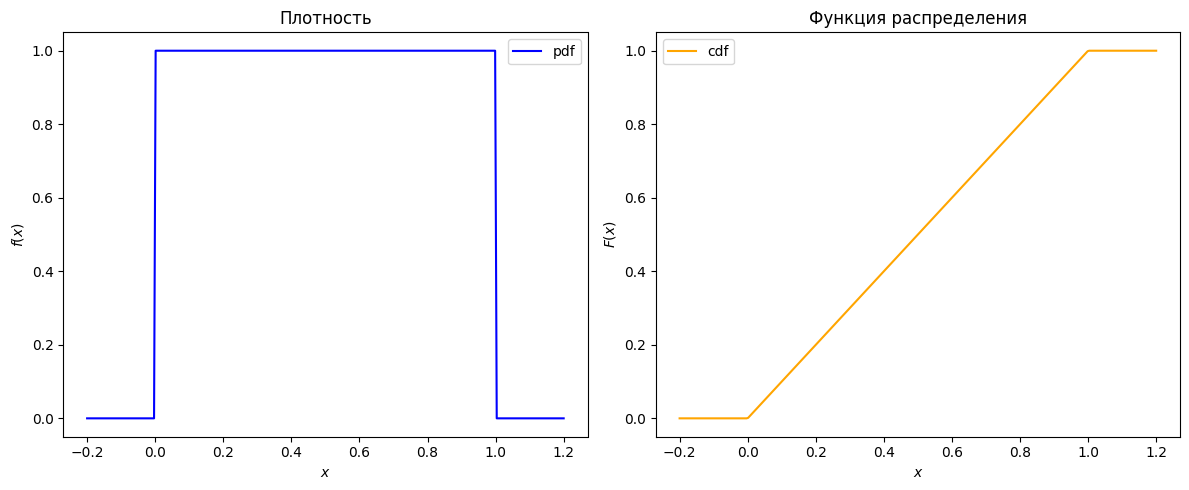

In [43]:
x = np.linspace(-0.2, 1.2, 300)
mu, sigma = 0, 1
dist = stats.uniform(loc=mu, scale=sigma)
dist_plot(dist, x)

## Биномиальное распределение 

Биномиальное распределение моделирует количество успехов в $n$ независимых испытаниях, каждое из которых имеет вероятность успеха $p$.

- метрики конверсии (важно: данные независимы)

---

**Вероятность того, что число успехов равно $k$ ($k$ — от 0 до $n$):**

$
P(X = k) = C_n^k \, p^k (1-p)^{n-k}
$


где:  
- $n$ — количество испытаний  
- $k$ — количество успехов  
- $p$ — вероятность успеха в каждом испытании  
---


**Математическое ожидание:**

$
\mathbb{E}[X] = np
$

**Дисперсия:**

$
\mathrm{Var}(X) = np(1-p)
$

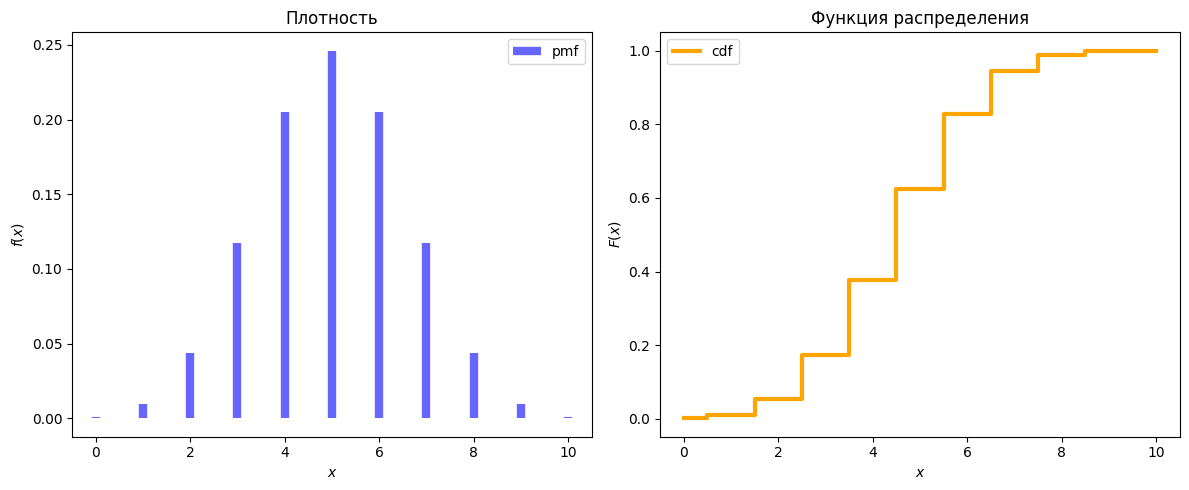

In [44]:
x = np.arange(0, 11)
dist = stats.binom(n=10, p=0.5)
dist_plot(dist, x, ftype = 'pmf')

## Распределение Пуассона 
- Один и тот же пользователь генерирует несколько событий, количество хорошо моделируется Пуассоном. 

**Функция вероятности (PMF):**

Вероятность того, что случится ровно $k$ событий за фиксированный интервал, если среднее число событий — $\lambda$:
$$
P(X = k) = \frac{\lambda^k \, e^{-\lambda}}{k!}
$$

где  
- $\lambda > 0$ — среднее число событий (параметр распределения),  
- $k = 0, 1, 2, \ldots$ — интересующее количество событий.

---

**Математическое ожидание:**

$
\mathbb{E}[X] = \lambda
$

---

**Дисперсия:**

$
\mathrm{Var}(X) = \lambda
$


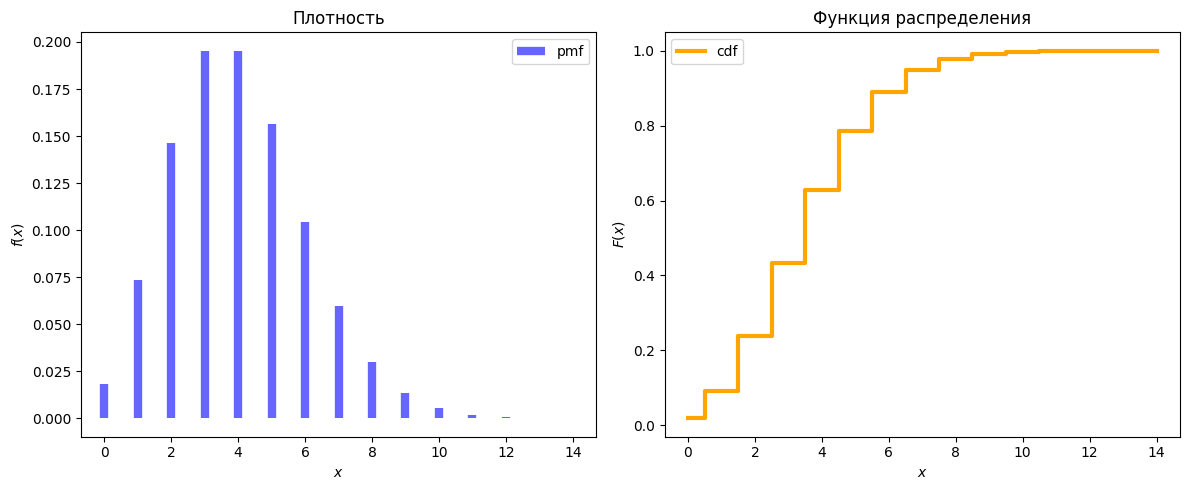

In [45]:
x = np.arange(0, 15)
lmbda = 4
dist = stats.poisson(lmbda)
dist_plot(dist, x, ftype = 'pmf')

## 3 Параметры, оценки

> **Параметр** - это характеристика всей генеральной совокупности (например, матожидание или дисперсия).

**Матожидание:**

$\mu:= \mathbb{E}[X]$

**Дисперсия:**

$\sigma^2:= \operatorname{Var}(X) = \mathbb{E}\big[(X - \mathbb{E}[X])^2\big]$


> **Статистика (выборочная статистика)** - это характеристика, посчитанная по данным конкретной выборки. 

**Примеры выборочных статистик**:

- Выборочное среднее (sample mean, $\bar{X}$):  
  $\bar{X} = \dfrac{1}{n} \sum\limits_{i=1}^{n} X_i$
- Выборочная дисперсия: 

  $S_b^2 = \dfrac{1}{n} \sum\limits_{i=1}^{n} (X_i - \bar{X})^2$ или $S^2 = \dfrac{1}{n-1} \sum\limits_{i=1}^{n} (X_i - \bar{X})^2$
- Любая другая функция, рассчитанная по данным из выборки!

## 3.1 Cвойства статистик или оценок
Пусть:  
- есть некоторая случайная выборка $X_1, X_2, ..., X_n$ с неизвестным параметром $\theta$,  
- есть оценка этого параметра $\hat{\theta}_n$, построенная по выборке.

### Несмещенность
> Оценка $\hat{\theta}_n$ называется **НЕСМЕЩЁННОЙ**, если:

$$\mathbb{E}[\hat{\theta}_n] = \theta$$


### Состоятельность 
> Оценка $\hat{\theta}_n$ называется **СОСТОЯТЕЛЬНОЙ**, елси чем больше данных вы собираете, тем точнее ваша оценка отражает истинный параметр в генеральной совокупности.

Оценка $\hat{\theta}_n$ называется состоятельной, если при $n \to \infty$ вероятность того, что она отклонится от $\theta$ на сколько угодно малую величину, стремится к нулю. Иначе говоря,
$$
\hat{\theta}_n \xrightarrow{P} \theta, \quad \text{при } n \to \infty,
$$
то есть сходимость по вероятности.

Или для любого $\epsilon > 0$:
$$
\lim_{n \to \infty} P\left( |\hat{\theta}_n - \theta| > \epsilon \right) = 0
$$

## 3.2 Выборочное среднее

### Является несмещенной оценкой матожидания: 
$\mathbb{E}[\bar{X}_n] = \mathbb{E}\left[ \dfrac{1}{n} \sum\limits_{i=1}^{n} X_i \right]
= \dfrac{1}{n} \sum\limits_{i=1}^{n} \mathbb{E}[X_i]
= \dfrac{1}{n} \cdot n\mu = \mu$

### Является состоятельной оценкой матожидания:
Для доказательства воспользуемся неравенством Чебышева: Пусть $X_n$ — последовательность случайных величин с математическим ожиданием $\mu_n = \mathbb{E}[X_n]$ и дисперсией $\sigma_n^2 = \mathrm{Var}(X_n)$. Тогда, для любого $\varepsilon > 0$:

$$P(|X_n - \mu_n| \geq \varepsilon) \leq \frac{\mathrm{Var}(X_n)}{\varepsilon^2}$$

Посчитаем дисперсию среднего:

$\operatorname{Var}(\bar X)=\operatorname{Var}\left(\dfrac{1}{n}\sum\limits_i^n X_i\right) = \dfrac{1}{n^2}\operatorname{Var}\left(\sum\limits_i^n X_i\right) = \dfrac{1}{n^2}n\sigma^2 = \dfrac{\sigma^2}{n}$

По неравенству Чебышёва получаем: 

$P(|\bar X -\mu| \geq \varepsilon)\leq \dfrac{\sigma^2}{n \varepsilon^2} \to 0, \ n\to \infty$

## 3.3 Выборочная дисперсия
$S_b^2 = \dfrac{1}{n} \sum\limits_{i=1}^{n} (X_i - \bar{X})^2$

### Является смещенной оценкой дисперсии: 

Преобразуем сумму

$
\sum_\limits{i=1}^n (X_i - \bar{X})^2 = \sum_\limits{i=1}^n [X_i^2 - 2 X_i \bar{X} + \bar{X}^2] = \sum\limits_{i=1}^n X_i^2 - 2\bar{X} \sum\limits_{i=1}^n X_i + n \bar{X}^2 = \sum\limits_{i=1}^n X_i^2 - 2n\bar{X}^2  + n \bar{X}^2 = \sum\limits_{i=1}^n X_i^2 - n \bar{X}^2$


Отсюда
$
S_b^2 = \dfrac{1}{n} \sum\limits_{i=1}^n X_i^2 - \bar{X}^2.
$

---

Математическое ожидание:

$
\mathbb{E}[S_b^2] = \mathbb{E}\left[\dfrac{1}{n}\sum_{i=1}^n X_i^2 - \bar{X}^2\right] = \dfrac{1}{n} \sum\limits_{i=1}^n \mathbb{E}[X_i^2] - \mathbb{E}[\bar{X}^2]
$


По определению дисперсии $\mathrm{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$, поэтому 

$\mathrm{Var}(X_i) = \mathbb{E}[X_i^2] - \mu^2, \mathbb{E}[X_i^2] = \sigma^2 + \mu^2$ и

$\mathrm{Var}(\bar{X}) = \mathbb{E}[\bar{X}^2] - \mu^2,  \mathbb{E}[\bar{X}^2] = \dfrac{\sigma^2}{n} + \mu^2$, получаем 

 


$
\mathbb{E}[S_b^2] = \sigma^2 + \mu^2 - \left(\dfrac{\sigma^2}{n} + \mu^2\right) = \sigma^2 - \dfrac{\sigma^2}{n} = \dfrac{n-1}{n}\sigma^2
$ - смещенная оценка дисперсии. 


### Является несмещенной оценкой дисперсии: 

$S^2 = \dfrac{n}{n-1}\cdot S_b^2 =  \dfrac{1}{n-1} \sum\limits_{i=1}^{n} (X_i - \bar{X})^2$ - несмещенная оценка дисперсии

### Является состоятельной оценкой дисперсии: 
Можно показать, что $
\mathrm{Var}(S^2) \to 0, \ n\to \infty
$. А дальше снова воспользоваться неравенством Чебышева. 

## 3.4 Cходимость оценок на симуляциях

Для разных значений $n$:
  - много раз (например, 10000 раз) генерируем выборки размера $n$ из нормального распределения,
  - для каждой выборки считаем $\bar X$ и $S^2$ — несмещённые выборочное среднее и выборочную дисперсию,
  - для каждого $n$ рассчитываем средние от этих оценок,
  - строим график зависимости $\mathrm{E}(\bar X)$ и $\mathrm{E}(S^2)$ от $n$.

Наши оценки должны сходиться к своим истинным параметрам. 

In [46]:
# Параметры нормального распределения
mu = 10      # матожидание (истинное)
sigma2 = 3  # дисперсия (истинное)
sigma = np.sqrt(sigma2)

# Диапазон размеров выборки
sample_sizes = np.arange(5, 1001, 5)  # от 5 до 1001, шаг 5
M = 10000  # число симуляций на каждое n

mean_estimates = []
unbiased_var_estimates = []

for n in sample_sizes:
    samples = stats.norm.rvs(mu, sigma, (M, n))
    means = np.mean(samples)
    unbiased_vars = samples.var(axis=1, ddof=1)  # несмещенная оценка!
    mean_estimates.append(means.mean())
    unbiased_var_estimates.append(unbiased_vars.mean())
    
mean_estimates = np.array(mean_estimates)
unbiased_var_estimates = np.array(unbiased_var_estimates)



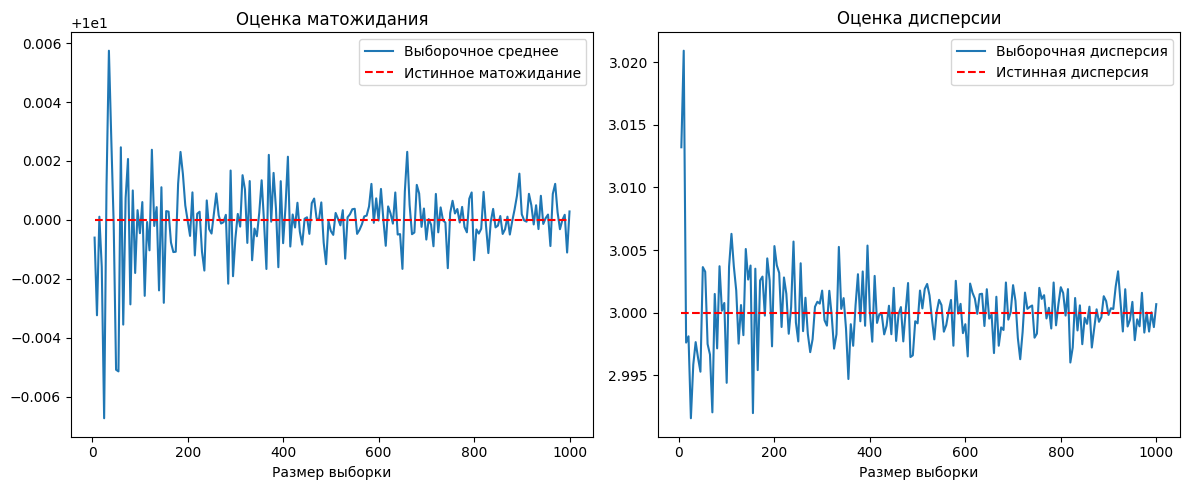

In [47]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(sample_sizes, mean_estimates, label="Выборочное среднее")
plt.hlines(mu, sample_sizes[0], sample_sizes[-1], colors='red', linestyles='dashed', label='Истинное матожидание')
plt.xlabel('Размер выборки')
plt.title("Оценка матожидания")
plt.legend()


plt.subplot(1,2,2)
plt.plot(sample_sizes, unbiased_var_estimates, label="Выборочная дисперсия")
plt.hlines(sigma2, sample_sizes[0], sample_sizes[-1], colors='red', linestyles='dashed', label='Истинная дисперсия')
plt.xlabel('Размер выборки')
plt.title("Оценка дисперсии")
plt.legend()

plt.tight_layout()
plt.show()

Для разных значений $n$:
  - много раз (например, 10000 раз) генерируем выборки размера $n$ из нормального распределения,
  - для каждой выборки считаем $S^2$ — несмещённую выборочную дисперсию,
  - для каждого $n$ рассчитываем дисперсию этих оценок,
  - строим график зависимости $\mathrm{Var}(S^2)$ от $n$.

$\mathrm{Var}(S^2)$ должны стремиться к нулю при росте $n$.

In [48]:

# Параметры настоящего распределения
mu = 0
sigma = 2  

n_list = np.arange(5, 1001, 5)
M = 10000  # число симуляций на каждое n

empirical_vars = []

for n in n_list:
    # Симулируем M выборок размера n из N(mu, sigma^2)
    samples = stats.norm.rvs(loc=mu, scale=sigma, size=(M, n))
    # Для каждой выборки считаем несмещённую выборочную дисперсию
    unbiased_vars  = samples.var(axis=1, ddof=1)
    # Считаем выборочную дисперсию оценок S^2 (эмпирическую)
    var_s2 = np.var(unbiased_vars, ddof=1)
    empirical_vars.append(var_s2)

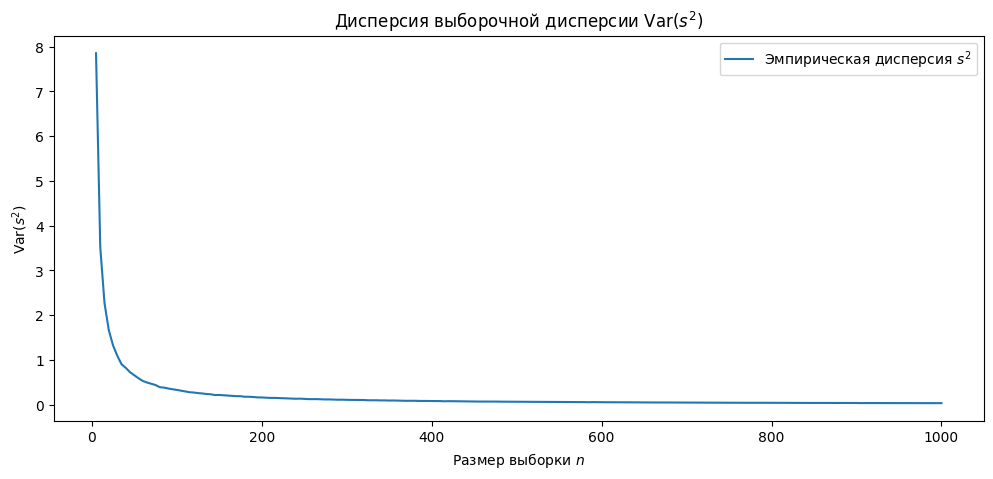

In [49]:
plt.figure(figsize=(12,5))
plt.plot(n_list, empirical_vars, '-', label='Эмпирическая дисперсия $s^2$')
plt.xlabel('Размер выборки $n$')
plt.ylabel(r'$\mathrm{Var}(s^2)$')
plt.title(r'Дисперсия выборочной дисперсии $\mathrm{Var}(s^2)$')
plt.legend()
plt.show()

## 4.1 Гипотезы и статистические критерии

Необходимо сформулировать гипотезу

$$H_0: \mu_t  = \mu_c$$
$$H_1: \mu_t  \neq \mu_c$$

Можно рассматривать в таком виде: 
$$H_0: \mu_t - \mu_c  = 0$$
$$H_1: \mu_t - \mu_c  \neq  0$$ 

Или через оценки: 

$$H_0:\bar X_t -  \bar X_c = 0$$
$$H_1:\bar X_t -  \bar X_c\neq 0$$

Мы предполагаем, что эффекта нет. То есть верна нулевая гипотеза, далее пытаемся это опровергнуть. 

- Критерий - это некоторое математическое правило: 

> Берем выборочную статистику, для которой знаем (при верности $H_0$) распределение или асимптотическое распределение, cмотрим, куда попала реализация и насколько вероятно получить такое значение или более экстремальное. **Если вероятность маленькая, отвергаем нулевую гипотезу**


Что это значит: если вероятность маленькая, отвергаем нулевую гипотезу?


Мы "разрешаем" себе ошибаться с вероятностью $\alpha$. 

$\alpha$ - ошибка I рода, отвергаем нулевую гипотезу при условии, что она верна. 

Тогда для двустороннего критерия 2 критической области (левая и правая), каждая имеет площадь $\alpha/2$. 

<img src="pictures/crit.png" width="600">

Тогда для одностороннего критерия критическая область одна и имеет площадь $\alpha$. 
<img src="pictures/two_one_crit.png" width="600">

Рассмотрим формальную запись вероятности "получить такое значение статистики (или более экстремальное)" и связанный с этим критерий проверки гипотезы — правило отклонения нулевой гипотезы при **уровне значимости $\alpha$**.

Дано:
- Пусть $T(X)$ — статистика критерия (функция от выборки).
- Пусть $t_{\text{набл}}$ — наблюдаемое по выборке значение статистики.
- Пусть $H_0$ — нулевая гипотеза.
- Пусть $P$ — вероятность при условии, что $H_0$ верна.

Вероятность получить наблюдаемое или более экстремальное значение статистики:

$$
\mathrm{p\text{-}value} = P_{H_0}(|T(X)| \ge |t_{\text{набл}}|)
$$

Отклоняем $H_0$, если:
$$
P_{H_0}(|T(X)| \ge |t_{\text{набл}}|) \le \alpha
$$

<span style="color:red">Не очень аккуратная запись для p-value в случае несимметричного распределения. </span>



<img src="pictures/two_one_crit_chi.png" width="600">


 

$H_0:\bar X_t -  \bar X_c = 0$

$H_1:\bar X_t -  \bar X_c\neq 0$

Хотим что-то понять про распределение.

## 4.2 Свойства нормального распределения


Нормальное распределение $\mathcal{N}(\mu, \sigma^2)$ — непрерывное распределение, в котором плотность убывает с ростом расстояния от $\mu$ по экспоненте квадрата.


$$
f(x) = \frac{1}{\sqrt{2\pi}\,\sigma}\;\exp\left(-\,\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

где  
- $x$ — аргумент (значение случайной величины),  
- $\mu$ — среднее (математическое ожидание),  
- $\sigma^2$ — дисперсия (квадрат стандартного отклонения),  
- $\exp$ — показатель экспоненты


Для стандартного нормального распределения ($\mu=0$, $\sigma=1$):

$$
\varphi(x) = \dfrac{1}{\sqrt{2\pi}}\,\exp^{-x^2/2}
$$



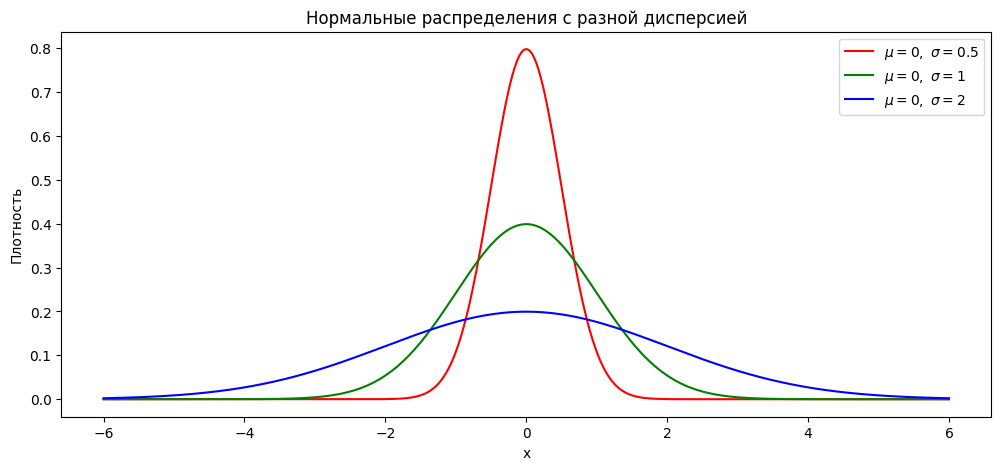

In [50]:
x = np.linspace(-6, 6, 400)
plt.figure(figsize=(12,5))
for sigma, color in zip([0.5, 1, 2], ["red", "green", "blue"]):
    y = stats.norm.pdf(x, loc=0, scale=sigma)
    plt.plot(x, y, label=f'$\mu=0,\ \sigma={sigma}$', color=color)
plt.title("Нормальные распределения с разной дисперсией")
plt.xlabel("x")
plt.ylabel("Плотность")
plt.legend()

plt.show()

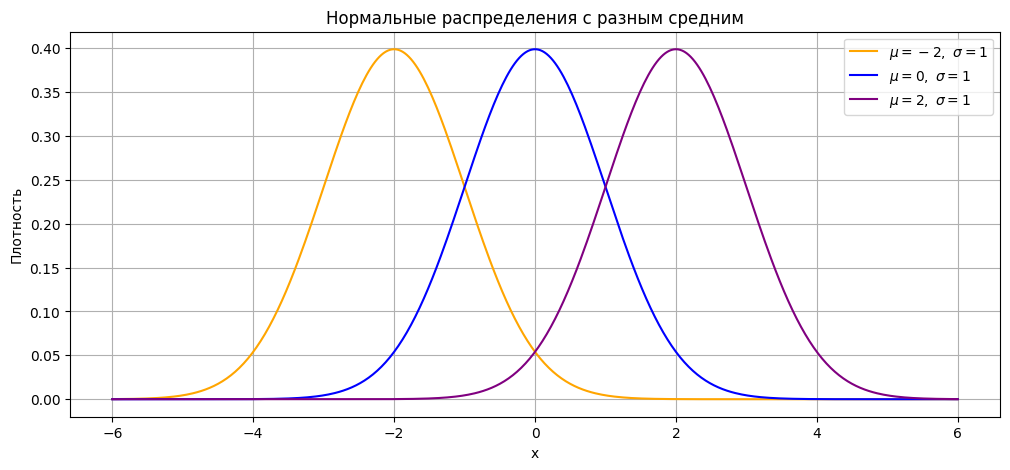

In [51]:
x = np.linspace(-6, 6, 400)
plt.figure(figsize=(12,5))
for mu, color in zip([-2, 0, 2], ["orange", "blue", "purple"]):
    y = stats.norm.pdf(x, loc=mu, scale=1)
    plt.plot(x, y, label=f'$\mu={mu},\ \sigma=1$', color=color)
plt.title("Нормальные распределения с разным средним")
plt.xlabel("x")
plt.ylabel("Плотность")
plt.legend()
plt.grid(True)
plt.show()

### 1. Умножение на константу

Если $X \sim \mathcal{N}(\mu, \sigma^2)$, а $a$ и $b$ — константы ($a \neq 0$), тогда случайная величина $Y = aX + b$ также распределена нормально:

$$
Y \sim \mathcal{N}(a\mu + b,\; a^2 \sigma^2)
$$

- Новое среднее: $a\mu + b$
- Новая дисперсия: $a^2 \sigma^2$

Объяснение:  
Масштабирование $X$ на $a$ сдвигает и "растягивает" распределение, а прибавление $b$ сдвигает график вдоль оси $x$.

---

### 2. Сумма независимых нормальных случайных величин

Если $X_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$ и $X_2 \sim \mathcal{N}(\mu_2, \sigma_2^2)$ — независимые случайные величины,
то их сумма:

$$
X = X_1 + X_2 \sim \mathcal{N}(\mu_1 + \mu_2,\; \sigma_1^2 + \sigma_2^2)
$$

То есть:
- Среднее суммируется: $\mu_1 + \mu_2$
- Дисперсии складываются: $\sigma_1^2 + \sigma_2^2$

Для суммы $n$ независимых $\mathcal{N}(\mu_i, \sigma_i^2)$:
$$
\sum_{i=1}^n X_i \sim \mathcal{N}\left(\sum_{i=1}^n \mu_i,\; \sum_{i=1}^n \sigma_i^2\right)
$$

## 4.3 ЦПТ


**Центральная предельная теорема (ЦПТ):**

Пусть $X_1, X_2, \ldots, X_n$ — независимые и одинаково распределённые случайные величины с математическим ожиданием $\mathbb{E}[X_i]=\mu$ и конечной дисперсией $\mathrm{Var}(X_i)=\sigma^2<\infty$.

Тогда при $n \to \infty$ среднее:
$$
\bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n}
$$

стремится по распределению к нормальному распределению $\mathcal{N}(\mu, \dfrac{\sigma^2}{n})$, то есть:
$$
\bar{X} \xrightarrow{d} \mathcal{N}(\mu, \dfrac{\sigma^2}{n}),\quad \text{при } n \to \infty.$$

Тогда при $n \to \infty$ нормированное среднее:
$$
Z_n = \dfrac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}
$$
стремится по распределению к стандартному нормальному распределению $\mathcal{N}(0, 1)$, то есть:

$$
\frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}} \xrightarrow{d} \mathcal{N}(0, 1),\quad \text{при } n \to \infty.
$$



In [52]:
# функция, которая генерирует выборки размера n, и считает Z нужное количество раз 
def z_stats(distribution_func, params, mu, sigma, sample_size =1000, M=1000): # sample_size - количество наблюдений, М - количество симуляций
    zstats = []
    for i in tqdm(range(M)):
        sample = distribution_func(*params, sample_size)
        mean = np.mean(sample)
        z = np.sqrt(sample_size)*(mean - mu)/sigma
        zstats.append(z)
    return zstats

In [53]:
def plot_mean(distribution_func, params,  mu, sigma, sample_size=1000, M=10000): # sample_size - количество наблюдений, М - количество симуляций
    x_n = z_stats(distribution_func, params, mu, sigma, sample_size, M)
    x = np.linspace(-6, 6, 1000)
    plt.plot(x, stats.norm.pdf(x), 'red', lw=2, label="normal")
    if distribution_func == np.random.normal:
        sns.kdeplot(x_n, fill = True, label='normal')
        plt.xlim(-6, 6)
        plt.title(f'The T for {sample_size} random variables: Normal vs Normal')
        plt.legend()
    elif distribution_func == np.random.uniform:
        sns.kdeplot(x_n, fill = True, label='uniform')
        plt.xlim(-6, 6)
        plt.title(f'The mean for {sample_size} random variables: Uniform vs Normal')
        plt.legend()
    elif distribution_func == np.random.exponential:
        sns.kdeplot(x_n, fill = True, label='exponential')
        plt.xlim(-6, 6)
        plt.title(f'The mean for {sample_size} random variables: Exponential vs Normal')
        plt.legend()
    elif distribution_func == np.random.binomial:
        sns.kdeplot(x_n, fill = True, label='binomial')
        plt.xlim(-6, 6)
        plt.title(f'The mean for {sample_size} random variables: Binomial vs Normal')
        plt.legend()
    else:
        return None

Посмотрим на сходимость Z-статистики (при условии, что мы ЗНАЕМ истинные параметры)

### Среднее равномерных

100%|██████████| 10000/10000 [00:00<00:00, 48316.30it/s]


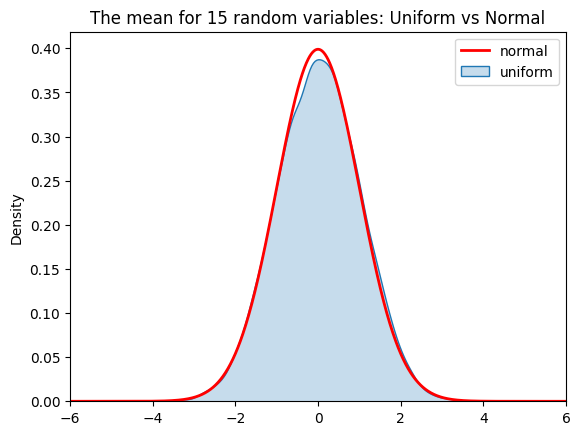

In [54]:
left = -1
right = 1
params = (left, right)
distribution_func = np.random.uniform
mu = (left + right) / 2
sigma = np.sqrt((right - left) ** 2 / 12)
#Измените sample_size, чтобы увидеть, как быстро средние значения сходятся к нормальному распределению.
sample_size = 15
M = 10000

plot_mean(distribution_func, params, mu, sigma, sample_size, M)

### Среднее нормальных

100%|██████████| 10000/10000 [00:00<00:00, 49333.03it/s]


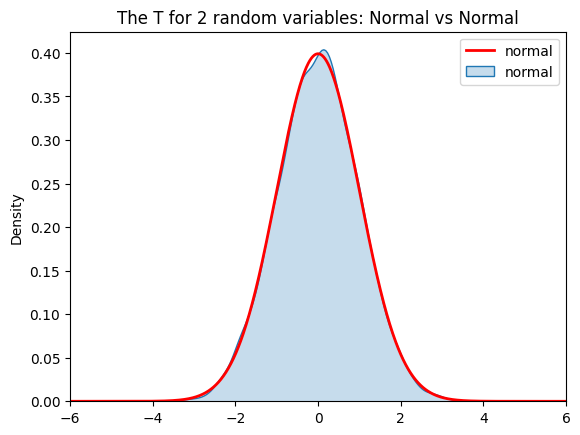

In [55]:
mu = 10
sigma = 5
params = (mu, sigma)
distribution_func = np.random.normal

#Измените sample_size, чтобы увидеть, как быстро средние значения сходятся к нормальному распределению.
sample_size = 2
M = 10000

plot_mean(distribution_func, params, mu, sigma, sample_size, M)

### Среднее экспоненциальных

100%|██████████| 10000/10000 [00:00<00:00, 52028.18it/s]


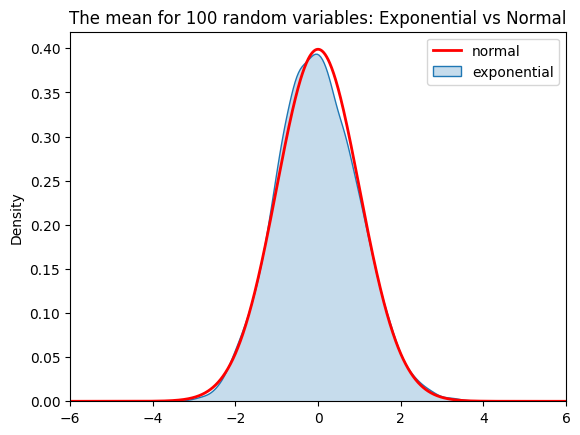

In [56]:
mu = 1000
sigma = 1000
params = (mu, )
distribution_func = np.random.exponential

#Измените sample_size, чтобы увидеть, как быстро средние значения сходятся к нормальному распределению.
sample_size = 100

M = 10000
plot_mean(distribution_func, params, mu, sigma, sample_size, M)

### Среднее биномиальных


100%|██████████| 10000/10000 [00:00<00:00, 62620.15it/s]


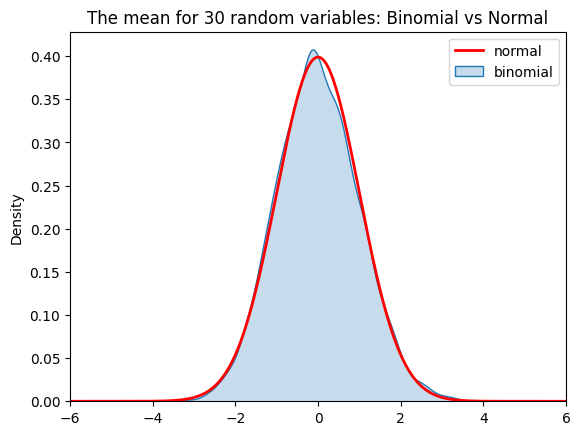

In [57]:
num = 10
p = 0.1
params = (num, p)
distribution_func = np.random.binomial

#Измените sample_size, чтобы увидеть, как быстро средние значения сходятся к нормальному распределению.
sample_size = 30

mu = num*p
sigma = np.sqrt(num*p*(1-p))

M = 10000
plot_mean(distribution_func, params, mu, sigma, sample_size, M)

## 5.1 t-статистика: данные нормальные

1. Пусть исходные данные приходят из нормального распределения $X_i \sim \mathcal{N}(\mu,\sigma^2)$,     

2. По свойству нормального распределения $Z = \dfrac{\bar{X} - \mu}{\sigma/\sqrt{n}} \sim \mathcal{N}(0,1)$   

3. $Y_i = \dfrac{X_i - \mu}{\sigma}$ и если мы построим несмещенную оценку дисперсии для $\bar Y$, то она будет равна $S_Y^2 = \dfrac{1}{n-1} \sum\limits_{i=1}^{n} \left(Y_i - \bar Y\right)^2 = \dfrac{1}{n-1} \sum\limits_{i=1}^{n} \left(\dfrac{X_i - \mu}{\sigma} - \dfrac{\bar X - \mu}{\sigma}\right)^2 = \dfrac{1}{\sigma^2}S^2$

$\sum\limits_{i=1}^{n} \left(Y_i - \bar Y\right)^2 = (n-1)\dfrac{S^2}{\sigma^2}$

Можно показать (но сложно) $U = (n-1)\dfrac{S^2}{\sigma^2} \sim \chi^2_{n-1}$

4. $T =
   \dfrac{\bar{X} - \mu}{S/\sqrt{n}}
   = \dfrac
        {\displaystyle \dfrac{\bar{X} - \mu}{\sigma/\sqrt{n}}}
        {\displaystyle \sqrt{\dfrac{S^2}{\sigma^2}}}
   = \dfrac{Z}{\sqrt{U/(n-1)}} \sim t(n-1)$ по определению распределение Стьюдента

## 5.2 t-статистика. данные произвольные

1. Пусть исходные данные приходят из распределения $X_i \sim F(\mu,\sigma^2)$,     

2. По ЦПТ $Z = \dfrac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} \mathcal{N}(0,1)$

3. $\dfrac{S^2}{\sigma^2} \xrightarrow{p} 1 $- состоятельная оценка дисперсии

4. $T =
   \dfrac{\bar{X} - \mu}{S/\sqrt{n}}
   = \dfrac
        {\displaystyle \dfrac{\bar{X} - \mu}{\sigma/\sqrt{n}}}
        {\displaystyle \sqrt{\dfrac{S^2}{\sigma^2}}}
    \xrightarrow{d} \mathcal{N}(0,1)$<br>  

## 5.3 t-распределение на асимптотике нормальное

$t(n) \xrightarrow{d} \mathcal{N}(0,1)$, при $n$ стремящимся к бесконечности.

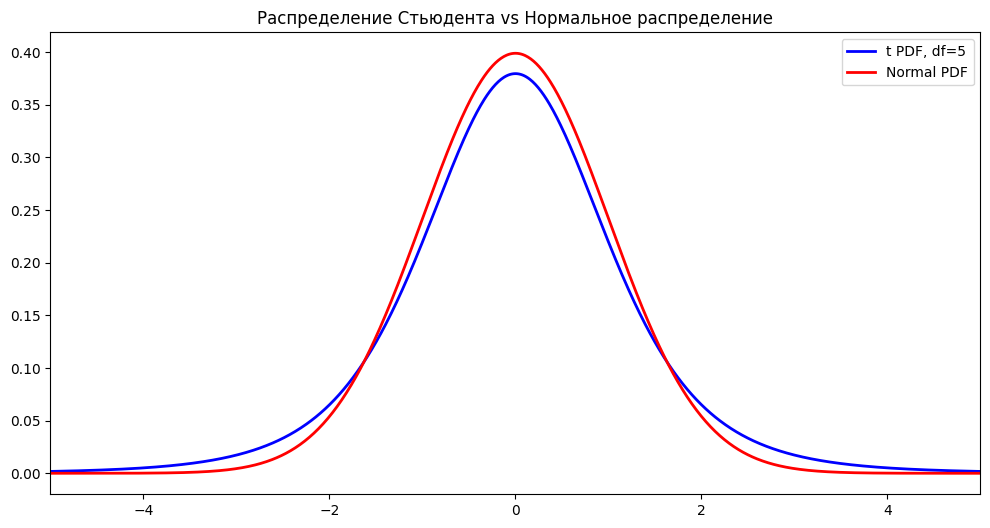

In [58]:
df = 5

plt.figure(figsize=(12, 6))
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.t.pdf(x, df=df), 'b', lw=2, label=f"t PDF, df={df}")
plt.plot(x, stats.norm.pdf(x), 'r', lw=2, label="Normal PDF")

plt.xlim(-5, 5)
plt.title("Распределение Стьюдента vs Нормальное распределение")
plt.legend()
plt.show()

## 5.4 Соберем все вместе для разницы средних

$$H_0:\bar X_t -  \bar X_c = 0$$
$$H_1:\bar X_t -  \bar X_c\neq 0$$

1. По ЦПТ 

$\bar X_t \xrightarrow{d} \mathcal{N}(\mu_t, \dfrac{\sigma_t^2}{n})$ и $\bar X_c \xrightarrow{d} \mathcal{N}(\mu_c, \dfrac{\sigma_c^2}{m})$

2. По свойству нормального распределения

$\bar X_t - \bar X_с \xrightarrow{d} \mathcal{N}(\mu_t - \mu_с, \dfrac{\sigma_t^2}{n} + \dfrac{\sigma_с^2}{m})$ 

3. При верности нулевой гипотезы $\mu_t - \mu_с = 0$, поэтому 

$\dfrac{\bar X_t - \bar X_с}{\sqrt{\dfrac{\sigma_t^2}{n} + \dfrac{\sigma_с^2}{m}}} \xrightarrow{d} \mathcal{N}(0, 1)$

4. 
$\dfrac{\bar X_t - \bar X_с}{\sqrt{\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m}}}  \xrightarrow{d} \mathcal{N}(0, 1)$

Для случая исходных данных из нормального распределения получим $t(n+m-2)$.


## 5.5 А какое должно быть n? 


  🔥 Вопрос на собеседовании. Что значит сходимость по распределению? Каким должен быть n и как вы будете его определять. 

In [59]:
def t_stats(distribution_func, params, sample_size =1000, M=1000): # n - количество наблюдений, М - количество симуляций
    tstats = []
    for i in tqdm(range(M)):
        test_sample = distribution_func(*params, sample_size)
        control_sample = distribution_func(*params, sample_size)
        test_mean = np.mean(test_sample)
        control_mean = np.mean(control_sample)
        test_var = np.var(test_sample, ddof=1)
        control_var = np.var(control_sample, ddof=1)
        sigma = np.sqrt(test_var/sample_size + control_var/sample_size)
        t = (test_mean - control_mean)/sigma
        tstats.append(t)
    return tstats

In [60]:
def plot_graph(distribution_func, params, sample_size=1000, M=10000): # sample_size - количество наблюдений, М - количество симуляций
    x_n = t_stats(distribution_func, params, sample_size, M)
    x = np.linspace(-6, 6, 1000)
    plt.plot(x, stats.norm.pdf(x), 'red', lw=2, label="normal")
    if distribution_func == np.random.normal:
        sns.kdeplot(x_n, fill = True, label='normal')
        plt.xlim(-6, 6)
        plt.title(f'The T for {sample_size} random variables: Normal vs Normal')
        plt.legend()
    elif distribution_func == np.random.uniform:
        sns.kdeplot(x_n, fill = True, label='uniform')
        plt.xlim(-6, 6)
        plt.title(f'The mean for {sample_size} random variables: Uniform vs Normal')
        plt.legend()
    elif distribution_func == np.random.exponential:
        sns.kdeplot(x_n, fill = True, label='exponential')
        plt.xlim(-6, 6)
        plt.title(f'The mean for {sample_size} random variables: Exponential vs Normal')
        plt.legend()
    elif distribution_func == np.random.binomial:
        sns.kdeplot(x_n, fill = True, label='binomial')
        plt.xlim(-6, 6)
        plt.title(f'The mean for {sample_size} random variables: Binomial vs Normal')
        plt.legend()
    else:
        return None



### Равномерное распределение

100%|██████████| 10000/10000 [00:00<00:00, 15859.27it/s]


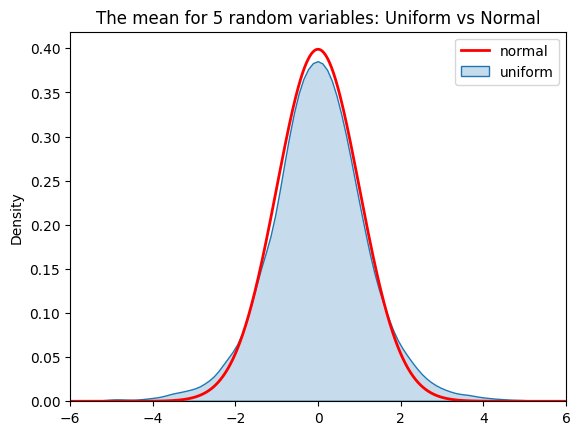

In [61]:
left = -1
right = 1
params = (left, right)
distribution_func = np.random.uniform

#Change the sample_size to see how quickly the means converge to normal.
sample_size = 5
M = 10000

plot_graph(distribution_func, params, sample_size, M)

### Нормальное распределение

100%|██████████| 10000/10000 [00:00<00:00, 14835.72it/s]


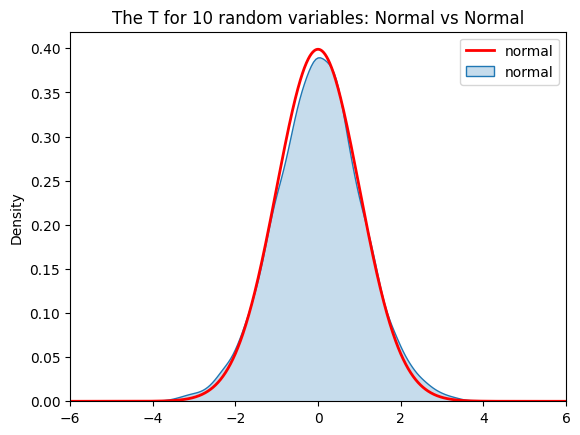

In [62]:
mu = 10
std = 5
params = (mu, std)
distribution_func = np.random.normal

#Change the sample_size to see how quickly the means converge to normal.
sample_size = 10
M = 10000

plot_graph(distribution_func, params, sample_size, M)

### Биномиальное распределение

100%|██████████| 10000/10000 [00:00<00:00, 12384.00it/s]


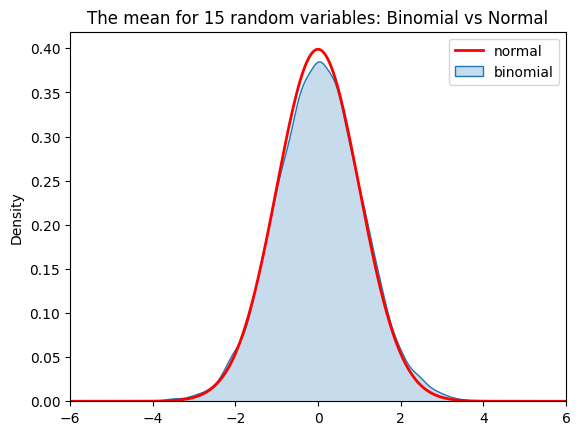

In [63]:
num = 10
p = 0.1
params = (num, p)
distribution_func = np.random.binomial

#Change the sample_size to see how quickly the means converge to normal.
sample_size = 15
M = 10000
plot_graph(distribution_func, params, sample_size, M)

### Экспоненциальное распределение

100%|██████████| 10000/10000 [00:00<00:00, 15441.97it/s]


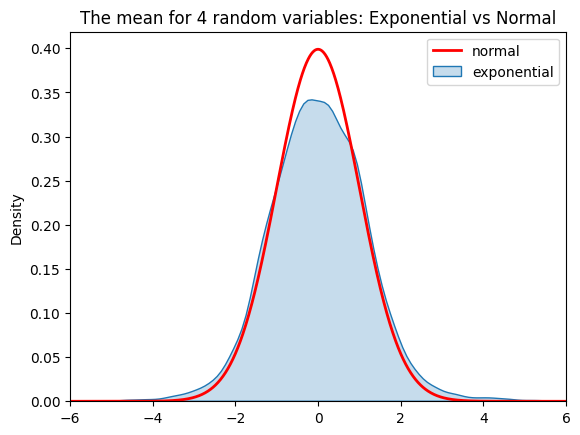

In [64]:
mu = 1000
params = (mu, )
distribution_func = np.random.exponential

#Change the sample_size to see how quickly the means converge to normal.
sample_size = 4

M = 10000
plot_graph(distribution_func, params, sample_size, M)

  🔥 Вопрос на собеседовании. Для использования t-теста какие данные можно подавать на вход. Классические заблуждение и стандартный ответ - нормальные. 